<a href="https://colab.research.google.com/github/alexandreValente/Robotic-Process-Automation-Projects/blob/master/1_eda-HOAI2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to time series analysis and forecasting

The dataset consists of multipe time series representing an aggregated number of daily views for multiple Wikipedia articles, starting from July, 1st, 2015 up until August 2Oth, 2017.



In [1]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
cd "/content/gdrive/My Drive/ColabNotebooks/CUHOAI-2020"

/content/gdrive/My Drive/ColabNotebooks/CUHOAI-2020


In [5]:
!ls -1 main/utils/*.py

main/utils/__init__.py
main/utils/utils_methods.py
main/utils/utils.py


In [6]:
!ls compet_data/

Kaggle2020train.csv  public


In [7]:
!pip install git+https://github.com/statsmodels/statsmodels.git

  Cloning https://github.com/statsmodels/statsmodels.git to /tmp/pip-req-build-s8dqv8iv
  Running command git clone -q https://github.com/statsmodels/statsmodels.git /tmp/pip-req-build-s8dqv8iv
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for statsmodels: filename=statsmodels-0.13.0.dev0+133.gc2c9f5682-cp36-cp36m-linux_x86_64.whl size=17988995 sha256=c075aa23c5bd1e99014628120946a48a4bb7ea4e8ff12dcb6637f222e7f838f5
  Stored in directory: /tmp/pip-ephem-wheel-cache-ke85vwwj/wheels/7b/bd/6d/3192a61f34609bda0eea70342907984dba2ad17c3abb502ce7
Successfully built statsmodels
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [8]:
!pip install supersmoother

     |████████████████████████████████| 235kB 4.1MB/s 
  Created wheel for supersmoother: filename=supersmoother-0.4-cp36-none-any.whl size=16147 sha256=826acb9f5010ecdfc5006f328239adc27cbc844dc16b85976bb5d2f887569507
  Stored in directory: /root/.cache/pip/wheels/20/5d/67/47e1696065b0417e0c4b2127769c44536fd13659fde86a982d
Successfully built supersmoother


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from main.utils.utils_methods import clean

In [10]:
# Import the 90 traffic time series
filePath = "compet_data/"
filename = "Kaggle2020train.csv"
data = pd.read_csv( filePath + filename, index_col = "Day", parse_dates = True )
data = data.asfreq("D")
data.head(3)

,series-1,series-2,series-3,series-4,series-5,series-6,series-7,series-8,series-9,series-10,series-11,series-12,series-13,series-14,series-15,series-16,series-17,series-18,series-19,series-20,series-21,series-22,series-23,series-24,series-25,series-26,series-27,series-28,series-29,series-30,series-31,series-32,series-33,series-34,series-35,series-36,series-37,series-38,series-39,series-40,series-41,series-42,series-43,series-44,series-45,series-46,series-47,series-48,series-49,series-50,series-51,series-52,series-53,series-54,series-55,series-56,series-57,series-58,series-59,series-60,series-61,series-62,series-63,series-64,series-65,series-66,series-67,series-68,series-69,series-70,series-71,series-72
Day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-07-01,202390,254862,2350,2496,91913,130162,85429,103304,105831,66813,17619,23161,517401,702908,744379,981453,690803,387606,5459,7823,395879,222580,316570,155514,159572,259518,2402,2996,110284,80175,82606,45670,367579,415758,3032,3543,151662,149119,265076,293291,12992,18647,2632,3021,12885,17749,580,666,286699,378069,5234,6756,188414,117712,101410,169865,31920,50324,649,785,20926,3613,3436,11108,125395,161629,5193,3687,81102,99629,47638,58173
2015-07-02,188759,257107,2453,2801,83272,124324,92778,107094,117642,66469,14747,18773,491760,719903,647246,946661,618566,357467,4758,6868,381501,212623,267960,150652,164087,256828,1819,2235,108893,82453,82294,51256,330595,516506,2096,2697,132479,152696,217932,279869,13578,20717,3731,4530,13165,19333,811,1091,292100,382987,4217,5409,194162,114857,100217,158799,26481,52886,561,877,21552,3806,3415,11293,127544,156566,3466,3336,99204,100055,43769,56225
2015-07-03,189827,271532,2271,2334,75505,118987,101119,128569,101796,60212,13737,17824,455102,640204,652811,979861,563501,342256,4611,5906,305618,185588,261061,148913,176816,243258,2518,2717,106310,77101,88134,52332,377751,459082,2606,2776,122852,148501,243302,304259,11942,18354,2888,3837,11348,17452,827,1174,293987,382880,4651,5418,188885,120084,104505,161498,25143,50406,720,973,19757,3427,3744,11838,124072,158922,4001,3602,75122,101869,45322,58668


In [11]:
data.shape

(782, 72)

In [12]:
data.tail(3)

,series-1,series-2,series-3,series-4,series-5,series-6,series-7,series-8,series-9,series-10,series-11,series-12,series-13,series-14,series-15,series-16,series-17,series-18,series-19,series-20,series-21,series-22,series-23,series-24,series-25,series-26,series-27,series-28,series-29,series-30,series-31,series-32,series-33,series-34,series-35,series-36,series-37,series-38,series-39,series-40,series-41,series-42,series-43,series-44,series-45,series-46,series-47,series-48,series-49,series-50,series-51,series-52,series-53,series-54,series-55,series-56,series-57,series-58,series-59,series-60,series-61,series-62,series-63,series-64,series-65,series-66,series-67,series-68,series-69,series-70,series-71,series-72
Day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-18,259646,370128,3280,3841,86636,115861,127651,217786,167619,88668,24828,29813,547926,697201,825223,1170393,600376,368632,14520,27885,260525,162602,304230,219950,241467,277377,2949,3764,101874,79140,145552,111392,706996,805586,28399,58531,118967,169358,495270,646116,11682,19126,2655,3420,10633,19160,1222,1480,356059,475511,10006,11348,177567,118864,182373,233231,33841,58574,1039,1425,24847,4242,5863,19759,157146,191461,8646,7157,82816,112038,72496,100586
2017-08-19,246816,364696,2871,3714,72553,92918,154269,230646,167486,60314,22471,27663,501580,673349,976704,1330227,542227,356536,16781,34200,209032,128547,295386,219497,228233,304572,2447,3271,90020,62472,151081,102698,539697,640558,30358,45764,99736,135509,322498,630128,8255,14793,2060,3809,7185,14500,1301,1445,359822,499084,9621,11057,167301,108036,208191,289083,29132,52120,1067,1773,19386,3940,5331,19967,159745,222510,7948,6396,77153,116192,80873,131925
2017-08-20,280688,455232,2455,3270,86211,99660,165089,274009,186234,65676,22367,27243,519855,569763,1078041,1496696,628282,452375,19757,40586,234036,144175,367337,274606,275054,362633,3302,4031,99532,71856,172285,116803,432909,575172,33303,44189,91510,124425,310133,564425,9631,16979,2356,4677,8140,16850,1361,1660,396227,494021,10038,11513,169677,112492,223703,269828,29678,54121,764,1417,19399,3887,5428,21154,166629,231149,7485,6070,83197,109338,90426,141742


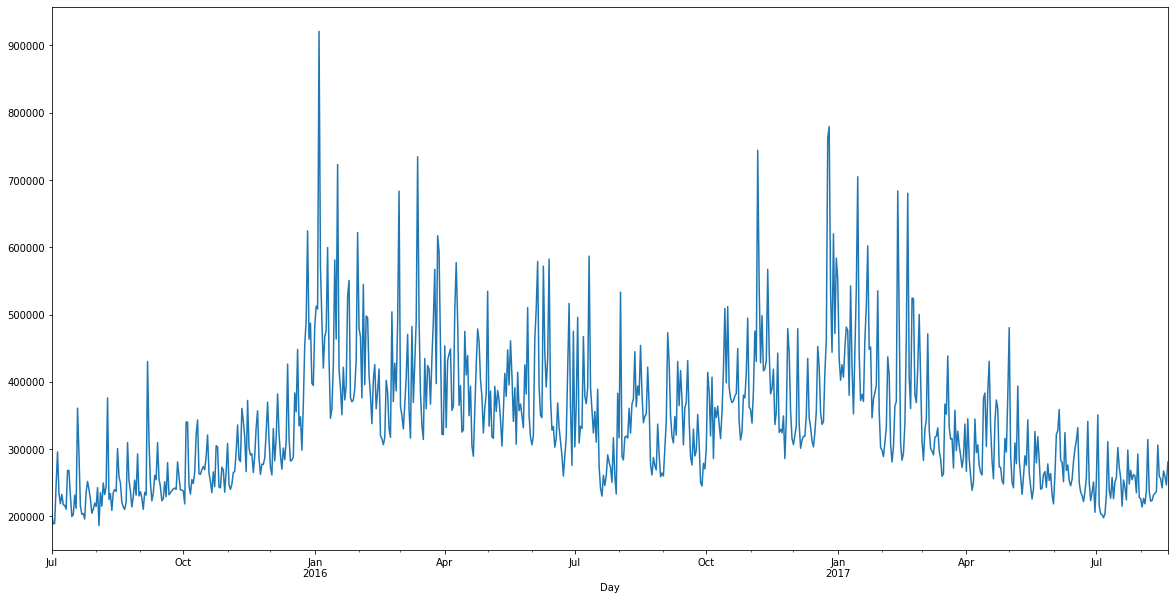

In [13]:
myts = 'series-1'
DT = data[myts]
DT.plot(figsize=(20, 10))

Read the code associated to the function "clean", and briefly describe what it is doing.

Réponse

La fonction clean renvoi la courbe lissée avec les outliers.

1. Elle applique la fonction STL à la série temporelle originale afin de décomposer la saisonalité
2. Applique la fonction SuperSmoother qui applique un lisseur (smoother) 
3. Calcule les limites (quantile) dans lesquels les résiduels sont acceptables.
4. Détecte les extremum (outliers) afin de les supprimer dans la série considéree. Les outliers (données aberantes) étant celles qui dépassent les limites calculée en 3.

L'idée est de lisser la courbe et de retirer la saisonalité afin d'analyser celle-ci plus facilement et faire des prédictions.

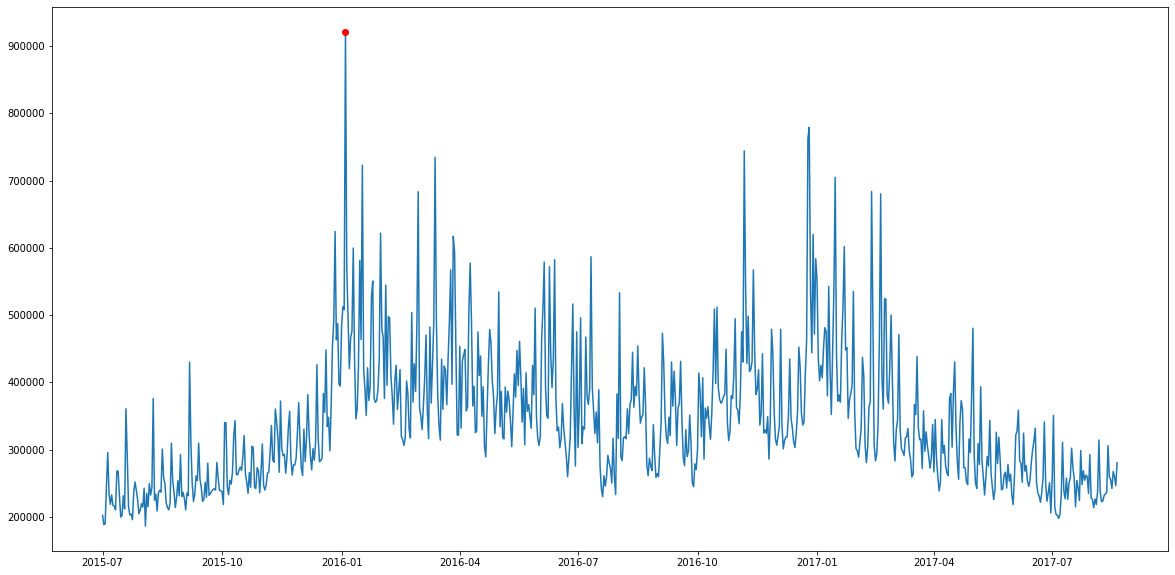

In [14]:
series = DT
series_cleaned_1, outliers_1 = clean(series)

fig1, (ax1, ax2) = plt.subplots(2,0, figsize=(20,10))
plt.plot(series)
plt.plot(series.loc[outliers_1], 'ro')

In [15]:
print("There are ",len(series.loc[outliers_1]),"outliers in original series:\n")
print(series.loc[outliers_1])

There are  1 outliers in original series:

Day
2016-01-04    920779
Freq: D, Name: series-1, dtype: int64


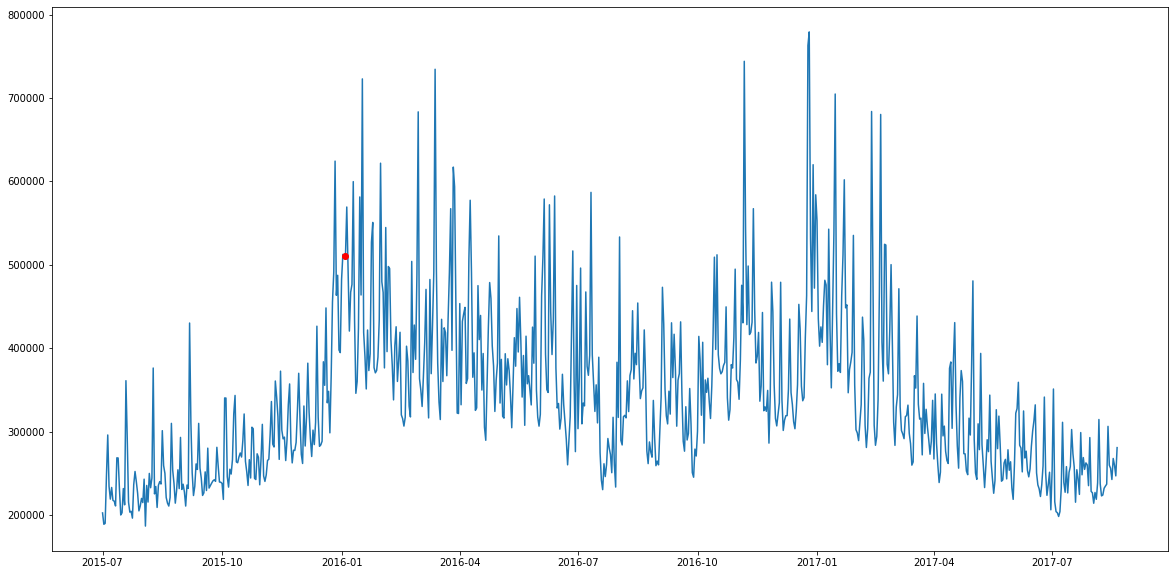

In [16]:
fig2, (ax1, ax2) = plt.subplots(2,0, figsize=(20,10))
plt.plot(series_cleaned_1)
plt.plot(series_cleaned_1.loc[outliers_1], 'ro')

In [17]:
series_cleaned_2, outliers_2 = clean(series_cleaned_1)
print("There are ",len(series_cleaned_2.loc[outliers_2]),"outliers in original series:\n")
print(series.loc[outliers_2])

There are  0 outliers in original series:

Series([], Freq: D, Name: series-1, dtype: int64)


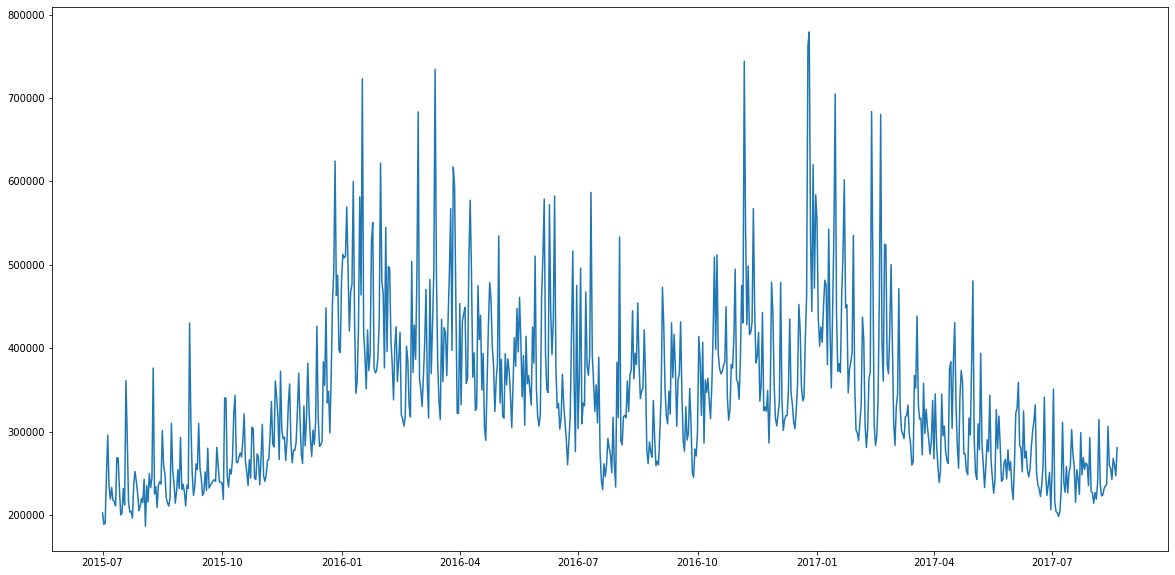

In [18]:
fig3, (ax1, ax2) = plt.subplots(2,0, figsize=(20,10))
plt.plot(series_cleaned_2)
plt.plot(series_cleaned_2.loc[outliers_2], 'ro')

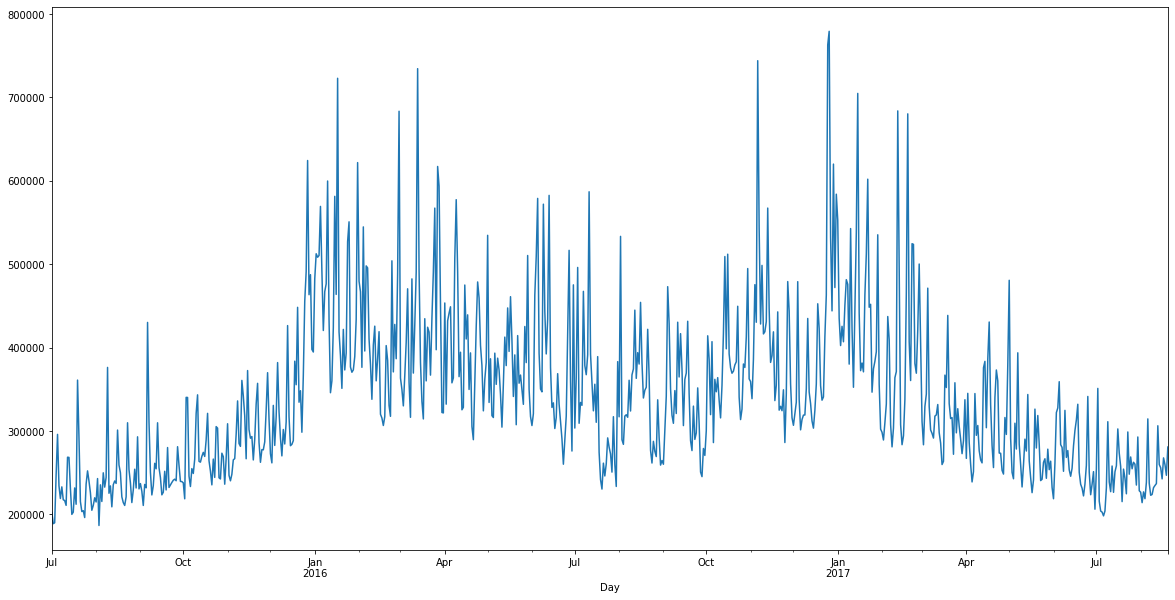

In [19]:
# Handle outliers
DT_cleaned_1, _ = clean(DT)
DT_cleaned_2, _ = clean(DT_cleaned_1)
DT.loc[:] = DT_cleaned_2
DT.plot(figsize=(20,10))


Creation d'un dataframe afin d'augmenter les donées de la série avec des colonnes (features) jour (d), mois (m), année (y) et semaine de l'année (wy.
Ceci permettra d'utiliser ces colonnes en index afin de prédire les valeurs 
pour un horizon journalier, mensuel, hebdomadaire...

In [20]:
DT = DT.to_frame()
DT["d"] = data.index.day.to_numpy()
DT["m"] = data.index.month.to_numpy()
DT["y"] = data.index.year.to_numpy()
DT["w"] = data.index.weekday.to_numpy()
DT["wy"] = data.index.weekofyear.to_numpy()
DT.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


,series-1,d,m,y,w,wy
Day,,,,,,
2015-07-01,202390.0,1,7,2015,2,27
2015-07-02,188759.0,2,7,2015,3,27
2015-07-03,189827.0,3,7,2015,4,27
2015-07-04,246934.0,4,7,2015,5,27
2015-07-05,295857.0,5,7,2015,6,27


In [21]:
DT2 = data[myts].copy()
DT2 = DT2.to_frame()
DT2.head()

,series-1
Day,
2015-07-01,202390.0
2015-07-02,188759.0
2015-07-03,189827.0
2015-07-04,246934.0
2015-07-05,295857.0


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
DT2[myts] = scaler.fit_transform(DT2[myts].values.reshape(-1, 1))

DT2 = pd.DataFrame(DT2)

print(DT2)

            series-1
Day                 
2015-07-01  0.026636
2015-07-02  0.003633
2015-07-03  0.005436
2015-07-04  0.101807
2015-07-05  0.184367
...              ...
2017-08-16  0.094302
2017-08-17  0.136803
2017-08-18  0.123259
2017-08-19  0.101607
2017-08-20  0.158768

[782 rows x 1 columns]


In [23]:
DT2["d"] = data.index.day.to_numpy()
DT2["m"] = data.index.month.to_numpy()
DT2["y"] = data.index.year.to_numpy()
DT2["w"] = data.index.weekday.to_numpy()
DT2["wy"] = data.index.weekofyear.to_numpy()
print(DT2.head())

            series-1  d  m     y  w  wy
Day                                    
2015-07-01  0.026636  1  7  2015  2  27
2015-07-02  0.003633  2  7  2015  3  27
2015-07-03  0.005436  3  7  2015  4  27
2015-07-04  0.101807  4  7  2015  5  27
2015-07-05  0.184367  5  7  2015  6  27


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


# Seasonal plots

The following code shows how to compute a seasonal plot (for the day of the month).

   series-1                      ...                              
m        1                   2   ...        11        12          
y      2016      2017      2016  ...      2016      2015      2016
d                                ...                              
1  482401.0  552961.0  479462.0  ...  359190.0  272604.0  306727.0
2  512442.0  434951.0  466812.0  ...  338661.0  261687.0  320279.0
3  508259.0  402366.0  376265.0  ...  385990.0  330609.0  334420.0
4  510350.5  425439.0  544641.0  ...  475383.0  282628.0  478979.0
5  569215.0  406928.0  395834.0  ...  430297.0  317032.0  338003.0

[5 rows x 26 columns] 

shape:  (31, 26) 




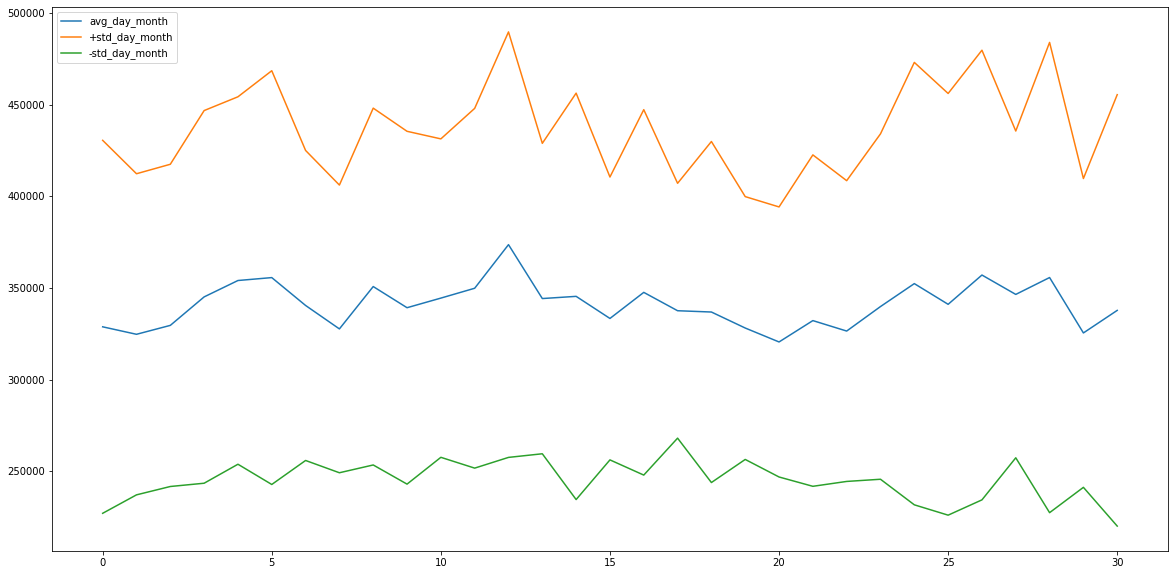

In [24]:
## Day of the month
patterns_day_month = DT[[myts, "d", "m", "y"]].pivot_table(index=['d'], columns=['m', 'y'])
print( patterns_day_month.head(), "\n\nshape: ",patterns_day_month.shape, "\n\n" )

#fig4, (ax1) = plt.subplots(1,0, figsize=(20,10))
#plt.plot(patterns_day_month)
#plt.show()

# Average seasonal pattern
avg_day_month = np.nanmean(patterns_day_month, axis = 1)
std_day_month = np.nanstd(patterns_day_month, axis = 1)
fig5, (ax1) = plt.subplots(1,0, figsize=(20,10))
plt.plot(pd.DataFrame({"avg": avg_day_month, "std+": avg_day_month +  std_day_month, "std-": avg_day_month -  std_day_month}))
plt.legend(('avg_day_month','+std_day_month','-std_day_month'))
plt.show()

In [25]:
patterns_day_month

series-1                      ...                              
m         1                   2   ...        11        12          
y       2016      2017      2016  ...      2016      2015      2016
d                                 ...                              
1   482401.0  552961.0  479462.0  ...  359190.0  272604.0  306727.0
2   512442.0  434951.0  466812.0  ...  338661.0  261687.0  320279.0
3   508259.0  402366.0  376265.0  ...  385990.0  330609.0  334420.0
4   510350.5  425439.0  544641.0  ...  475383.0  282628.0  478979.0
5   569215.0  406928.0  395834.0  ...  430297.0  317032.0  338003.0
6   491784.0  450518.0  497869.0  ...  743944.0  381956.0  301304.0
7   420443.0  481385.0  495477.0  ...  543068.0  323215.0  313642.0
8   467016.0  475775.0  410176.0  ...  428209.0  291508.0  318942.0
9   476330.0  380103.0  379791.0  ...  498474.0  270065.0  319118.0
10  599662.0  542648.0  337932.0  ...  416308.0  301709.0  350555.0
11  433575.0  422822.0  402901.0  ...  418956.0  284343.0  434849.0
12  345807.0  352352.0  425620.0  ...  431056.0  310994.0  346596.0
13  360032.0  443321.0  360050.0  ...  567229.0  426310.0  332768.0
14  423949.0  538012.0  386525.0  ...  446415.0  316874.0  311860.0
15  581279.0  704706.0  418998.0  ...  382158.0  282281.0  303336.0
16  463714.0  441465.0  319967.0  ...  390306.0  283896.0  324666.0
17  722848.0  372295.0  315489.0  ...  418818.0  288342.0  356231.0
18  418766.0  381402.0  306521.0  ...  336373.0  383628.0  452470.0
19  390150.0  370842.0  317148.0  ...  354750.0  355408.0  422825.0
20  351047.0  462997.0  402322.0  ...  442737.0  448195.0  354363.0
21  421720.0  512048.0  384686.0  ...  324925.0  334425.0  336876.0
22  373116.0  601869.0  330437.0  ...  329512.0  348212.0  340775.0
23  393419.0  448315.0  317505.0  ...  324253.0  298424.0  412760.0
24  526949.0  451841.0  503975.0  ...  349298.0  366618.0  463000.0
25  550734.0  346469.0  370768.0  ...  286091.0  455420.0  762869.0
26  376643.0  374466.0  427694.0  ...  344190.0  491211.0  779181.0
27  370359.0  383426.0  386596.0  ...  479087.0  624255.0  532466.0
28  373206.0  394998.0  488109.0  ...  443692.0  463340.0  443942.0
29  389144.0  535185.0  683318.0  ...  356221.0  487352.0  619952.0
30  433742.0  356088.0       NaN  ...  315753.0  397757.0  471933.0
31  621748.0  302133.0       NaN  ...       NaN  394635.0  583867.0

[31 rows x 26 columns]

   series-1                      ...                              
m        1                   2   ...        11        12          
y      2016      2017      2016  ...      2016      2015      2016
d                                ...                              
1  482401.0  552961.0  479462.0  ...  359190.0  272604.0  306727.0
2  512442.0  434951.0  466812.0  ...  338661.0  261687.0  320279.0
3  508259.0  402366.0  376265.0  ...  385990.0  330609.0  334420.0
4  510350.5  425439.0  544641.0  ...  475383.0  282628.0  478979.0
5  569215.0  406928.0  395834.0  ...  430297.0  317032.0  338003.0

[5 rows x 26 columns] 

shape:  (31, 26) 


    series-1                      ...                              
m         1                   2   ...        11        12          
y       2016      2017      2016  ...      2016      2015      2016
d                                 ...                              
1   482401.0  552961.0  479462.0  ...  359190.0  272604.0  306727.0
2   512442.0

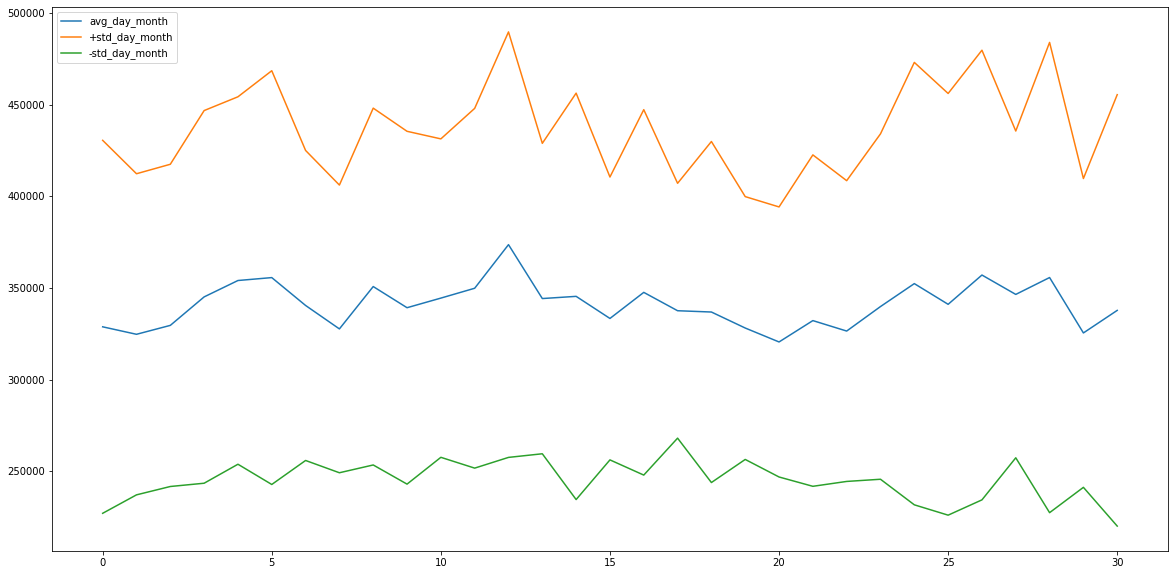

In [26]:
## Day of the month
print( patterns_day_month.head(), "\n\nshape: ",patterns_day_month.shape, "\n\n" )
print( patterns_day_month, "\n\nshape: ",patterns_day_month.shape, "\n\n" )

#fig4, (ax1) = plt.subplots(1,0, figsize=(20,10))
#plt.plot(patterns_day_month)
#plt.show()

# Average seasonal pattern
avg_day_month = np.nanmean(patterns_day_month, axis = 1)
std_day_month = np.nanstd(patterns_day_month, axis = 1)
fig5, (ax1) = plt.subplots(1,0, figsize=(20,10))
plt.plot(pd.DataFrame({"avg": avg_day_month, "std+": avg_day_month +  std_day_month, "std-": avg_day_month -  std_day_month}))
plt.legend(('avg_day_month','+std_day_month','-std_day_month'))
plt.show()

Using the previous code, produce a seasonal plot for the day of the week.

    series-1                           ...                                   
wy        1              2         3   ...   52                  53          
y       2016      2017 2016 2017 2016  ... 2015 2016      2017 2015      2016
d                                      ...                                   
1        NaN       NaN  NaN  NaN  NaN  ...  NaN  NaN  0.618242  NaN  0.499169
2        NaN  0.419095  NaN  NaN  NaN  ...  NaN  NaN       NaN  NaN  0.549865
3        NaN  0.364106  NaN  NaN  NaN  ...  NaN  NaN       NaN  NaN  0.542806
4   0.546335  0.403043  NaN  NaN  NaN  ...  NaN  NaN       NaN  NaN       NaN
5   0.645672  0.371804  NaN  NaN  NaN  ...  NaN  NaN       NaN  NaN       NaN

[5 rows x 114 columns] 

shape:  (31, 114) 




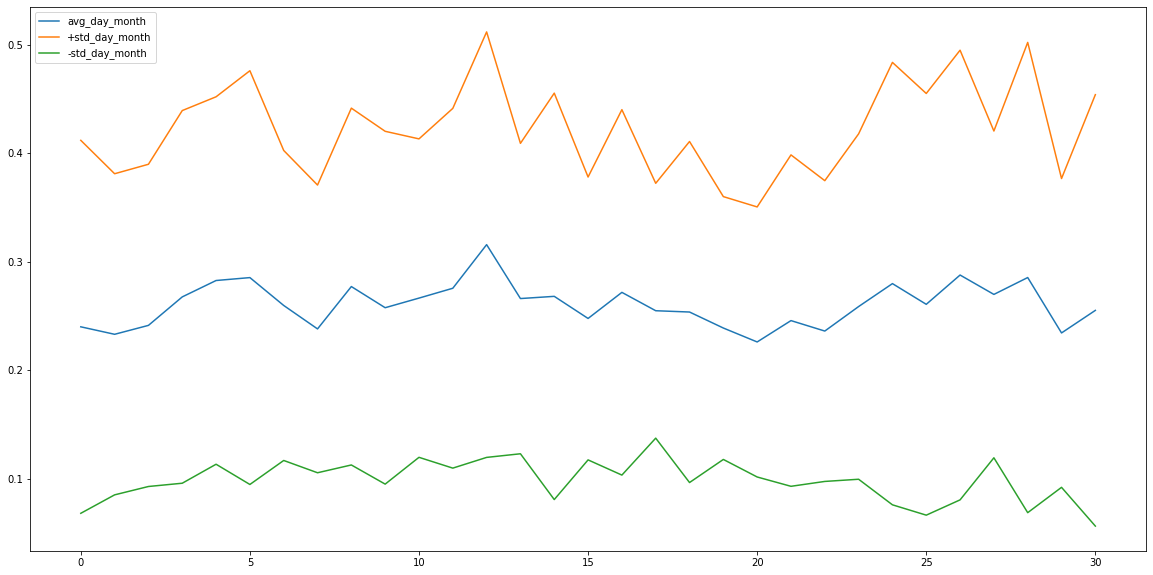

In [27]:
## Day of the week
patterns_day_week = DT2[[myts, "d", "wy", "y"]].pivot_table(index=['d'], columns=['wy', 'y'])
print( patterns_day_week.head(), "\n\nshape: ",patterns_day_week.shape, "\n\n" )

#fig4, (ax1) = plt.subplots(1,0, figsize=(20,10))
#plt.plot(patterns_day_week)
#plt.show()

# Average seasonal pattern
avg_day_week = np.nanmean(patterns_day_week, axis = 1)
std_day_week = np.nanstd(patterns_day_week, axis = 1)
fig5, (ax1) = plt.subplots(1,0, figsize=(20,10))
plt.plot(pd.DataFrame({"avg": avg_day_week, "std+": avg_day_week +  std_day_week, "std-": avg_day_week -  std_day_week}))
plt.legend(('avg_day_month','+std_day_month','-std_day_month'))
plt.show()

In [28]:
patterns_day_week.shape

(31, 114)

In [29]:
#patterns_day_week.columns
#patterns_day_week[('wy','y','d')]

In [30]:
patterns_day_week

series-1                      ...                              
wy        1                   2   ...        52        53          
y       2016      2017      2016  ...      2017      2015      2016
d                                 ...                              
1        NaN       NaN       NaN  ...  0.618242       NaN  0.499169
2        NaN  0.419095       NaN  ...       NaN       NaN  0.549865
3        NaN  0.364106       NaN  ...       NaN       NaN  0.542806
4   0.546335  0.403043       NaN  ...       NaN       NaN       NaN
5   0.645672  0.371804       NaN  ...       NaN       NaN       NaN
6   0.515003  0.445365       NaN  ...       NaN       NaN       NaN
7   0.394612  0.497454       NaN  ...       NaN       NaN       NaN
8   0.473206  0.487987       NaN  ...       NaN       NaN       NaN
9   0.488924       NaN       NaN  ...       NaN       NaN       NaN
10  0.697053       NaN       NaN  ...       NaN       NaN       NaN
11       NaN       NaN  0.416773  ...       NaN       NaN       NaN
12       NaN       NaN  0.268660  ...       NaN       NaN       NaN
13       NaN       NaN  0.292665  ...       NaN       NaN       NaN
14       NaN       NaN  0.400528  ...       NaN       NaN       NaN
15       NaN       NaN  0.666030  ...       NaN       NaN       NaN
16       NaN       NaN  0.467634  ...       NaN       NaN       NaN
17       NaN       NaN  0.904935  ...       NaN       NaN       NaN
18       NaN       NaN       NaN  ...       NaN       NaN       NaN
19       NaN       NaN       NaN  ...       NaN       NaN       NaN
20       NaN       NaN       NaN  ...       NaN       NaN       NaN
21       NaN       NaN       NaN  ...       NaN       NaN       NaN
22       NaN       NaN       NaN  ...       NaN       NaN       NaN
23       NaN       NaN       NaN  ...       NaN       NaN       NaN
24       NaN       NaN       NaN  ...       NaN       NaN       NaN
25       NaN       NaN       NaN  ...       NaN       NaN       NaN
26       NaN       NaN       NaN  ...       NaN       NaN       NaN
27       NaN       NaN       NaN  ...       NaN       NaN       NaN
28       NaN       NaN       NaN  ...       NaN  0.467002       NaN
29       NaN       NaN       NaN  ...       NaN  0.507524       NaN
30       NaN       NaN       NaN  ...       NaN  0.356328       NaN
31       NaN       NaN       NaN  ...       NaN  0.351059       NaN

[31 rows x 114 columns]

# Lag plot
Produce lagged scatterplots for multiple lags. What do you observe? Add the diagonal for a better visualization.

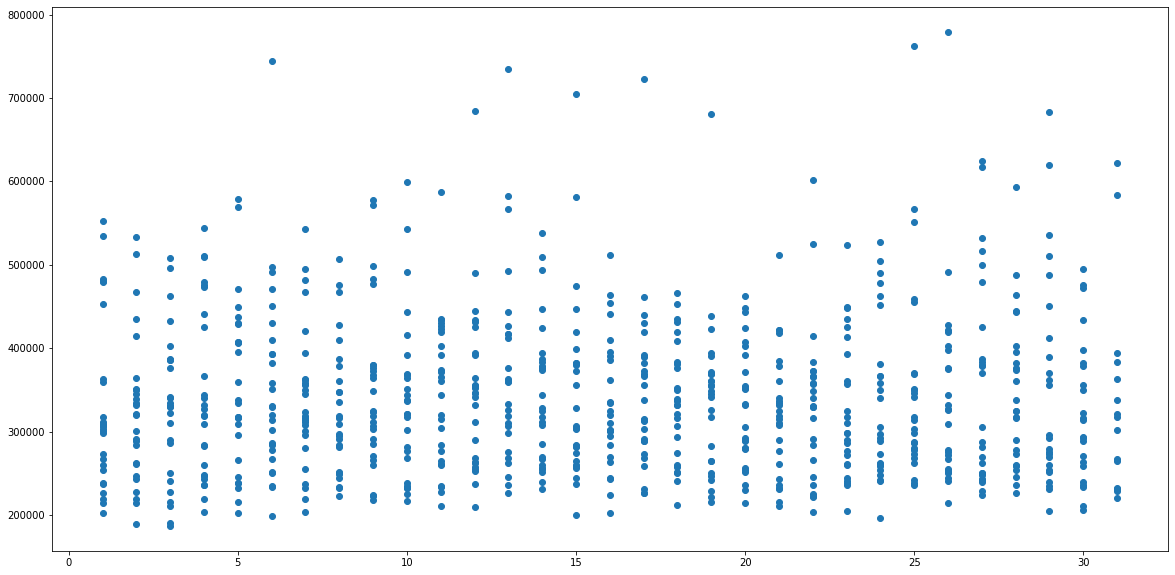

In [31]:
# Use pd.shift
fig6, (ax1) = plt.subplots(1,0, figsize=(20,10))
plt.scatter(DT['d'],DT[myts])

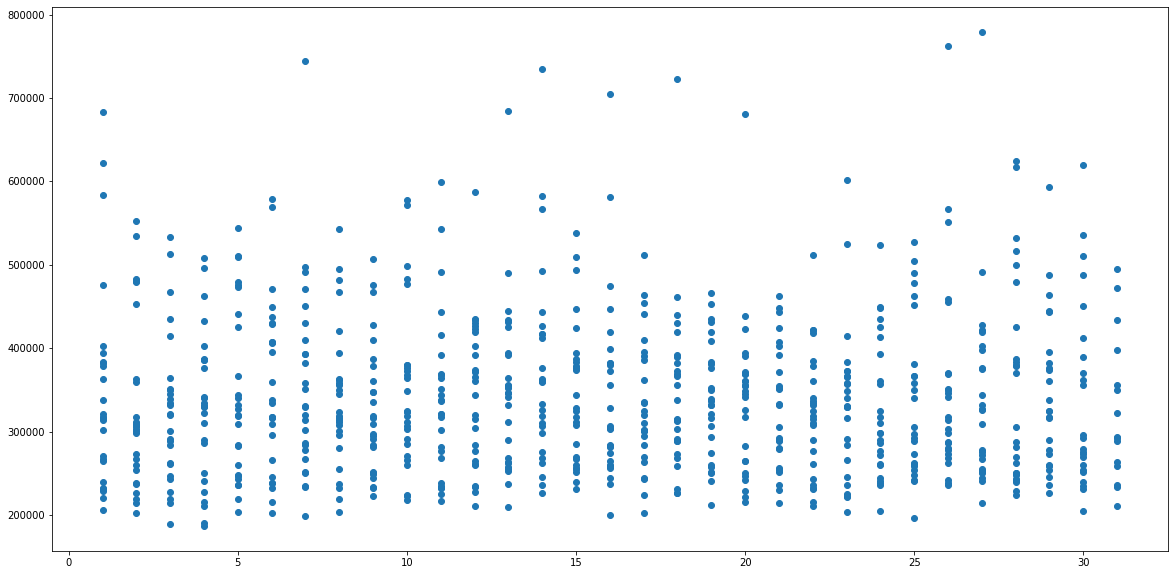

In [32]:
DT_shifted = DT.shift(periods=1)
fig7, (ax1) = plt.subplots(1,0, figsize=(20,10))
plt.scatter(DT['d'],DT_shifted[myts])

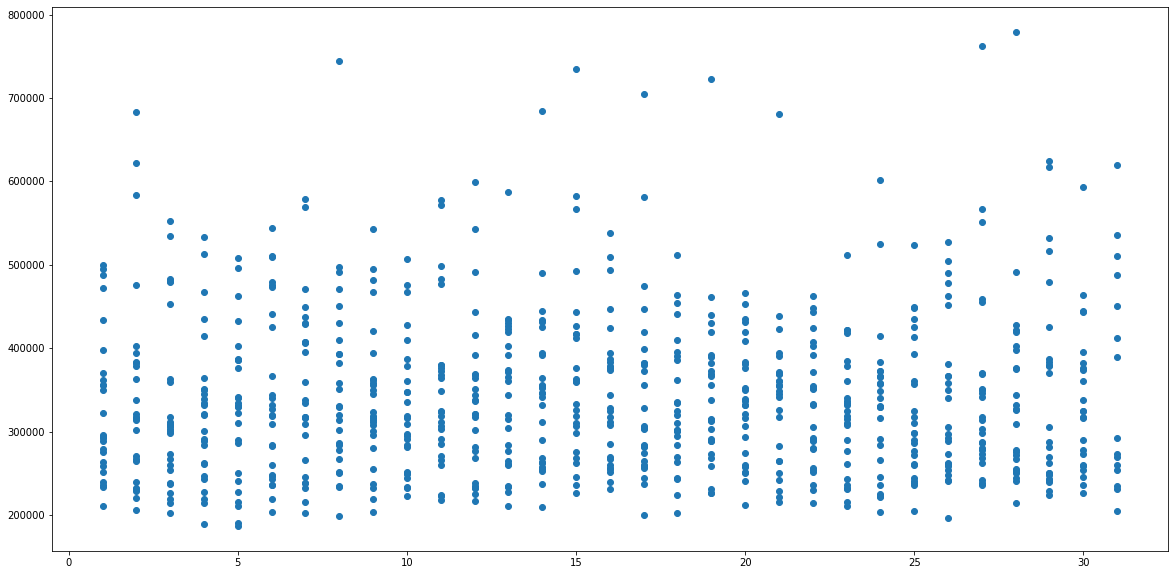

In [33]:
DT_shifted = DT.shift(periods=2)
fig8, (ax1) = plt.subplots(1,0, figsize=(20,10))
plt.scatter(DT['d'],DT_shifted[myts])

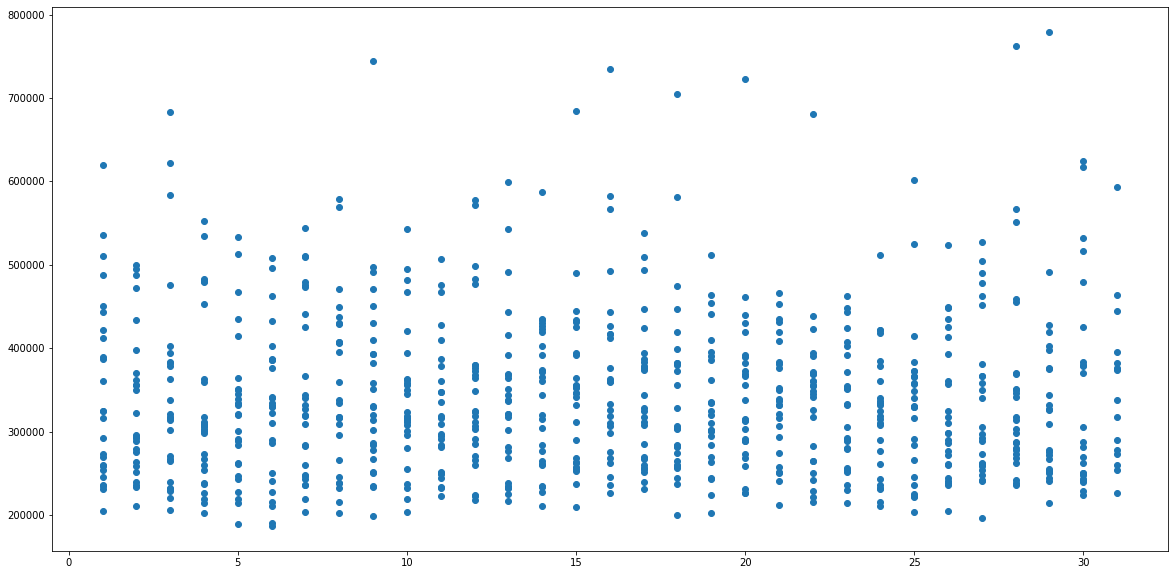

In [34]:
DT_shifted = DT.shift(periods=3)
fig9, (ax1) = plt.subplots(1,0, figsize=(20,10))
plt.scatter(DT['d'],DT_shifted[myts])

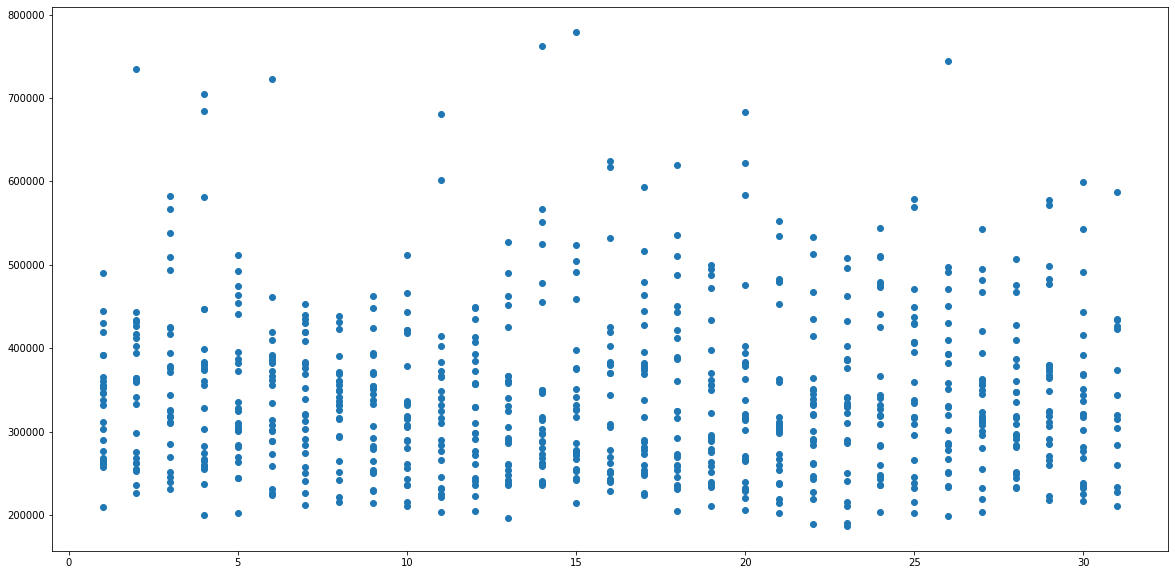

In [35]:
DT_shifted = DT.shift(periods=20)
fig10, (ax1) = plt.subplots(1,0, figsize=(20,10))
plt.scatter(DT['d'],DT_shifted[myts])

## Autocorrelation
Plot the autocorrelation function (ACF) for the first 20 lags, and interpret the results. 
Recompute the ACF after applying a seasonal difference. 




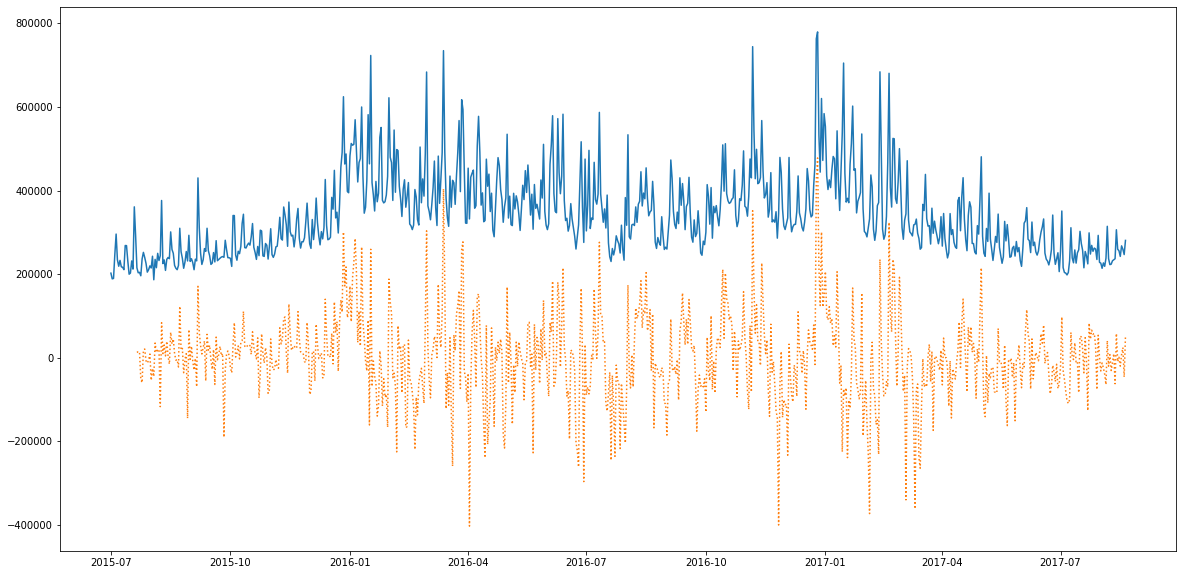

In [36]:
from statsmodels.tsa.stattools import acf 
from statsmodels.graphics.tsaplots import plot_acf
# Use np.diff
lag=20
diff1 = DT[myts].diff( periods = lag )

# Create figure
fig11, (ax1) = plt.subplots(1,1, figsize=(20,10))
# Make plot
plt.plot(DT[myts])
plt.plot(diff1, linestyle='dotted')
#plt.axvline(x='2015-07-01'+lag)
plt.show()

In [37]:
DT

,series-1,d,m,y,w,wy
Day,,,,,,
2015-07-01,202390.0,1,7,2015,2,27
2015-07-02,188759.0,2,7,2015,3,27
2015-07-03,189827.0,3,7,2015,4,27
2015-07-04,246934.0,4,7,2015,5,27
2015-07-05,295857.0,5,7,2015,6,27
...,...,...,...,...,...,...
2017-08-16,242487.0,16,8,2017,2,33
2017-08-17,267672.0,17,8,2017,3,33
2017-08-18,259646.0,18,8,2017,4,33


In [38]:
DT.head(3)

,series-1,d,m,y,w,wy
Day,,,,,,
2015-07-01,202390.0,1,7,2015,2,27
2015-07-02,188759.0,2,7,2015,3,27
2015-07-03,189827.0,3,7,2015,4,27


In [39]:
DT.loc[ '2015-07-01' , 'm' ]

7.0

In [40]:
diff1[20]

12828.0

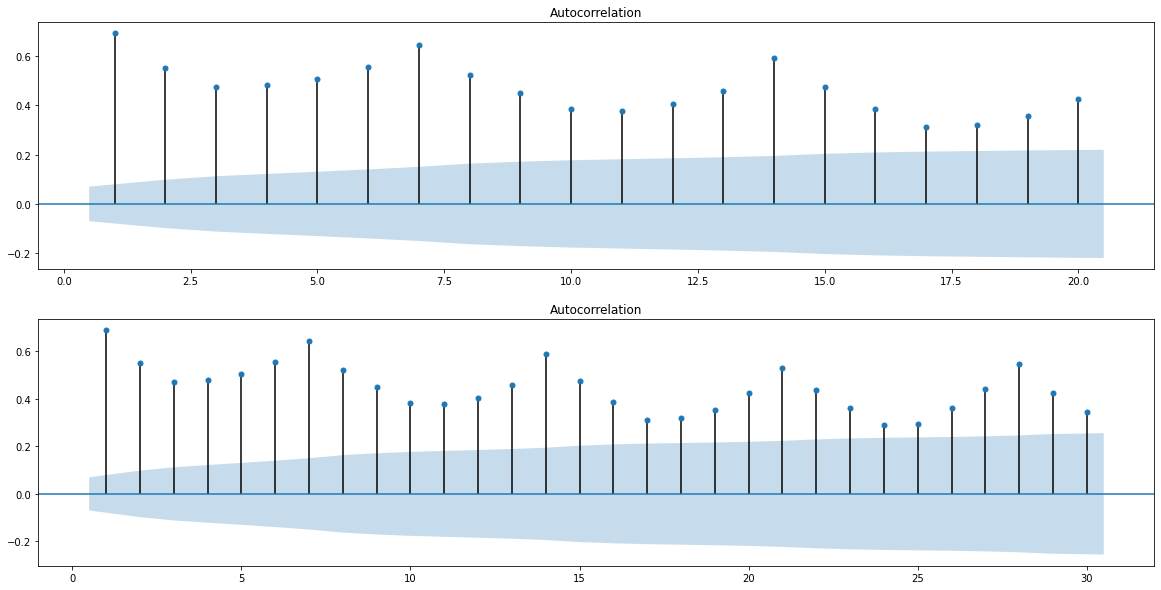

In [41]:
from statsmodels.tsa.stattools import acf 
from statsmodels.graphics.tsaplots import plot_acf
# Create figure
fig11, (ax1, ax2) = plt.subplots(2,1, figsize=(20,10))
# Make ACF plot
plot_acf(DT[myts], lags=20, zero=False, ax=ax1)
# Make ACF plot
plot_acf(DT[myts], lags=30, zero=False, ax=ax2)
plt.show()

## White noise process

- Generate a time series with 500 observations from a white noise process with zero mean and unit standard deviation.
- Plot the time series
- Compute and plot the ACF for 50 lags
- Did you expect to see such results? Why?



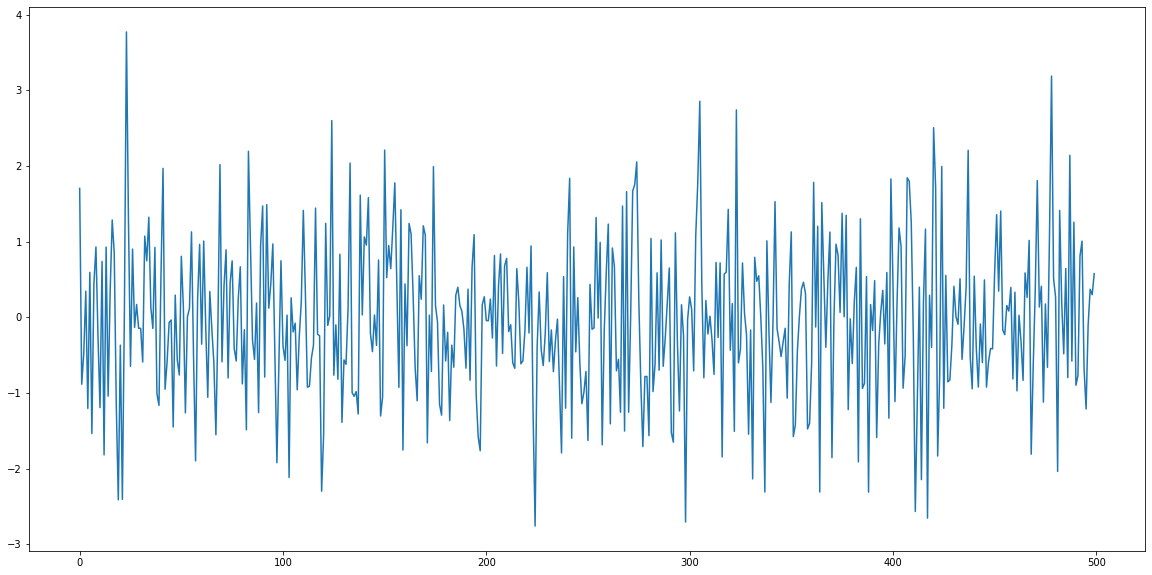

In [42]:
#1. Generate white noise TS
noise = np.random.normal(loc=0, scale=1, size=500)
#2. Plotting the white noise
fig12, (ax1) = plt.subplots(1,1, figsize=(20,10))
plt.plot(noise)

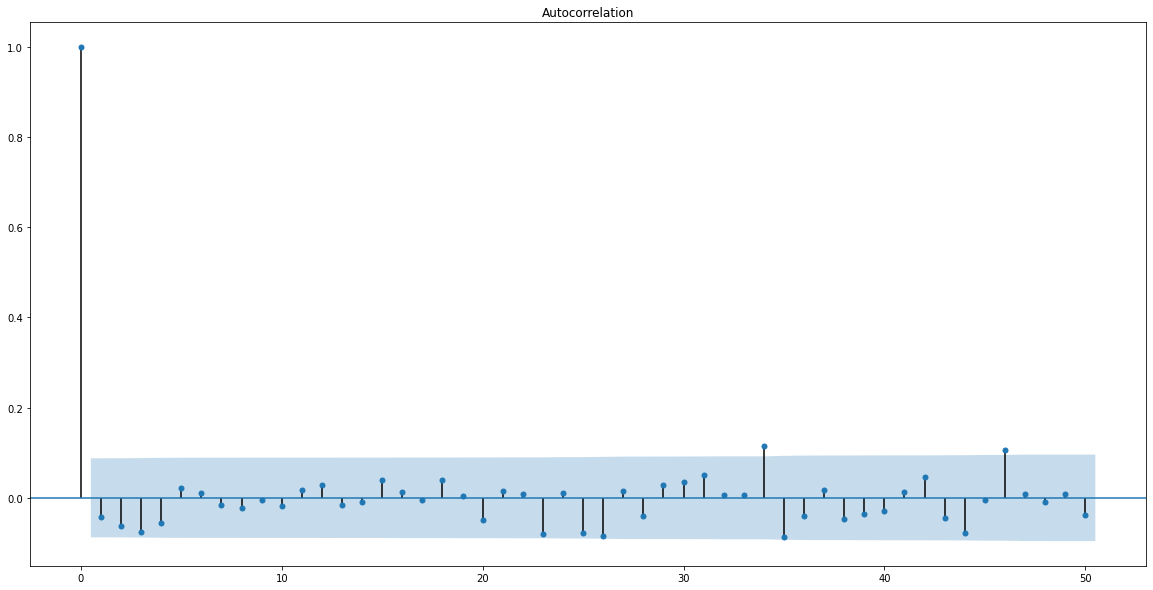

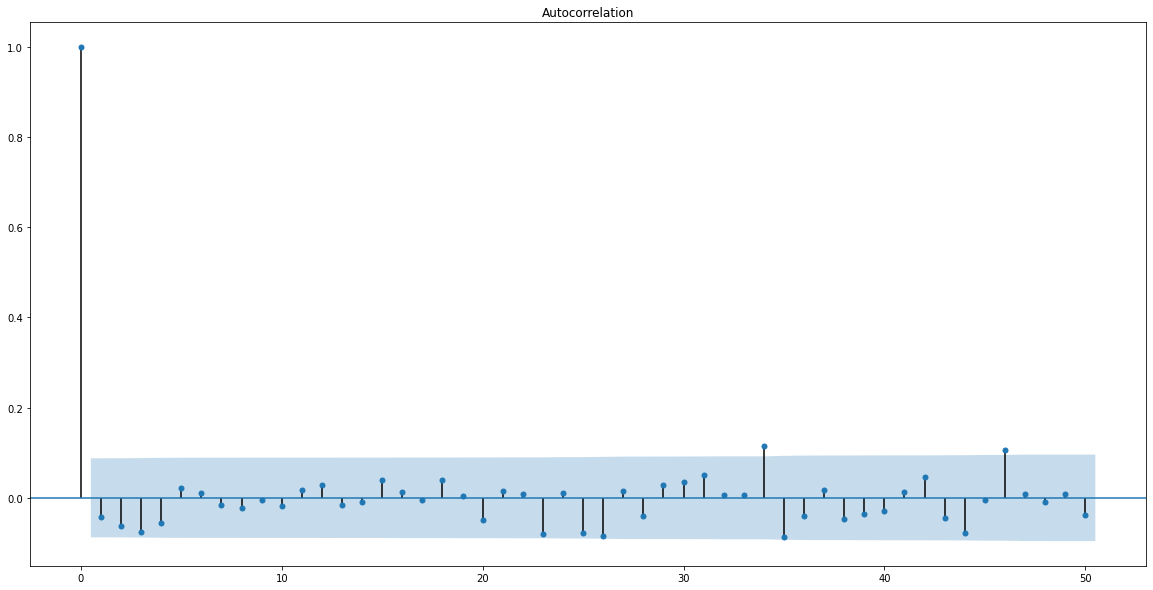

In [43]:
#3. Compute ACF for 50 lags on white noise and Plot
fig13, (ax1) = plt.subplots(figsize=(20,10))
plot_acf(noise, lags=50, ax=ax1)

As we model white noise with a random normal distribution, there is no autocorelation possible between time series. Therefore all the lags fall within the blue area which means no autocorelation, except the 1 one which is the 1 lag autocorelation.

## Transformations

Compute various Box-Cox transformations. Which one do you think is more appropriate?

Text(0.5, 1.0, 'Probplot after Box-Cox transformation')

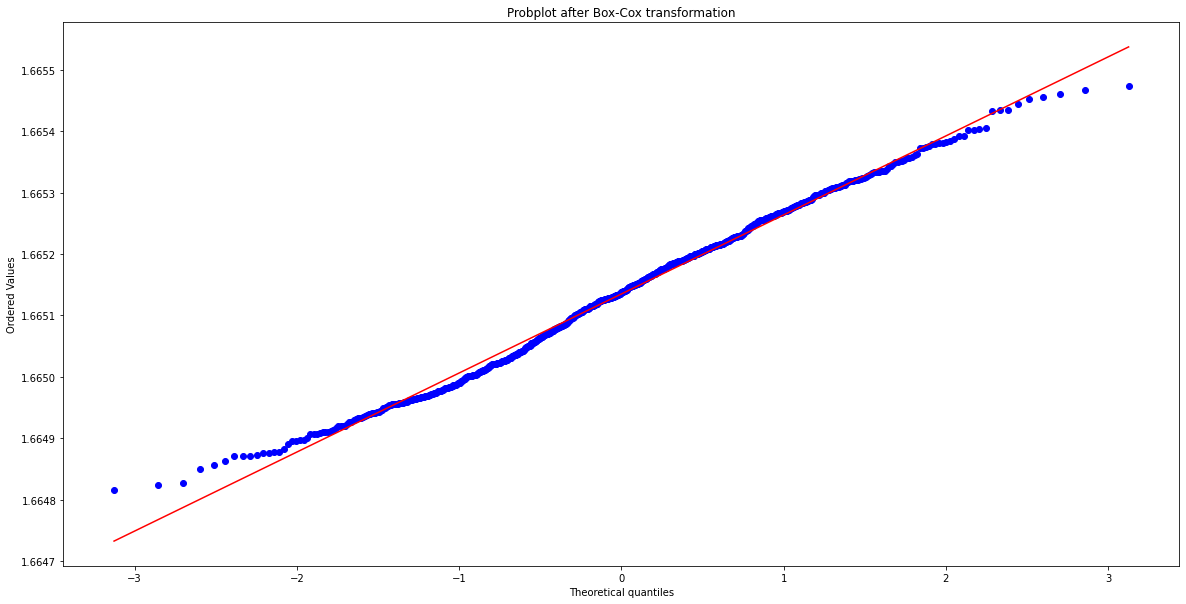

In [44]:
from scipy.stats import boxcox, probplot, norm

fig14, (ax) = plt.subplots(figsize=(20,10))
xt, _ = boxcox(DT[myts])
prob = probplot(xt, dist=norm, plot=ax)
ax.set_title('Probplot after Box-Cox transformation')

## Time series decomposition 


Decompose the time series into trend, seasonal and remainder components. Does it help you to understand the data?

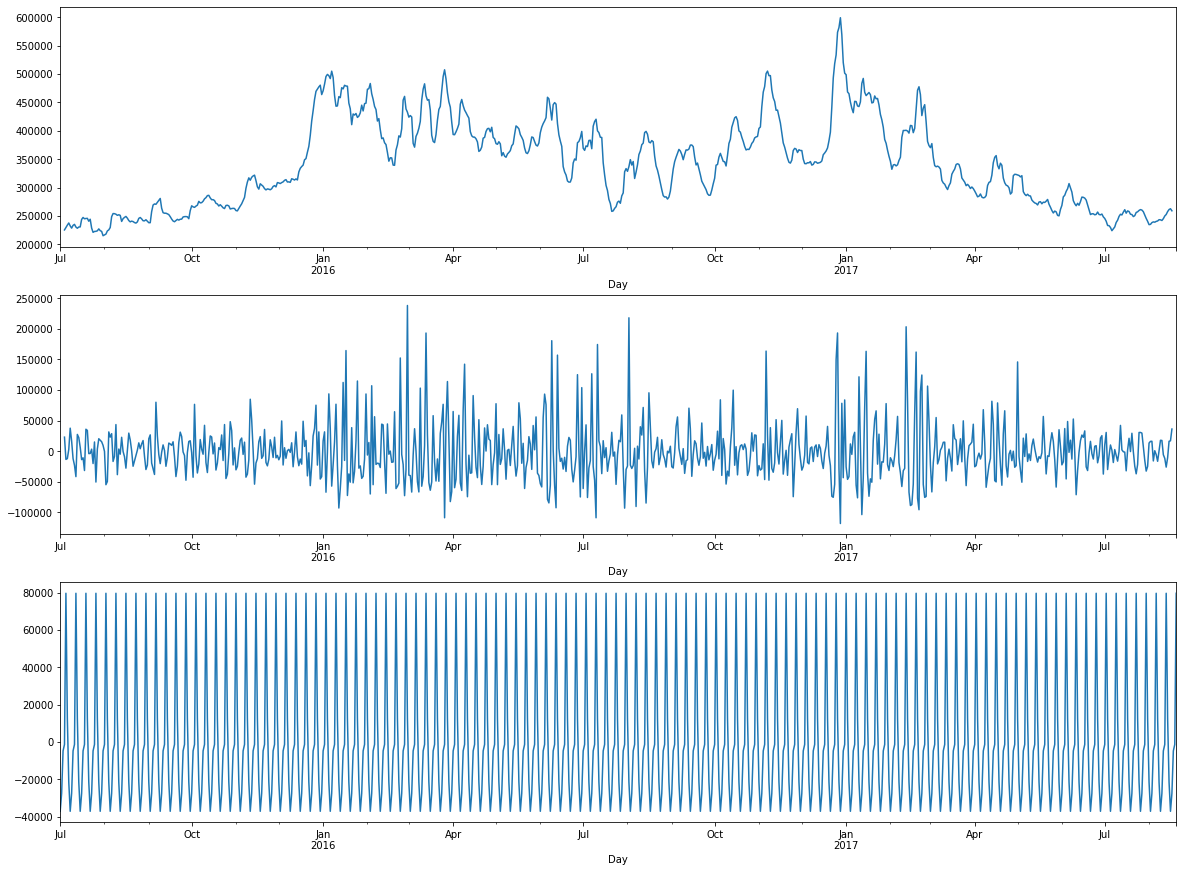

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(DT[myts], model='additive')

fig15, (ax1, ax2, ax3) = plt.subplots(ncols=1, nrows=3, figsize=(20,15))
result.trend.plot(ax=ax1)
result.resid.plot(ax=ax2)
result.seasonal.plot(ax=ax3)

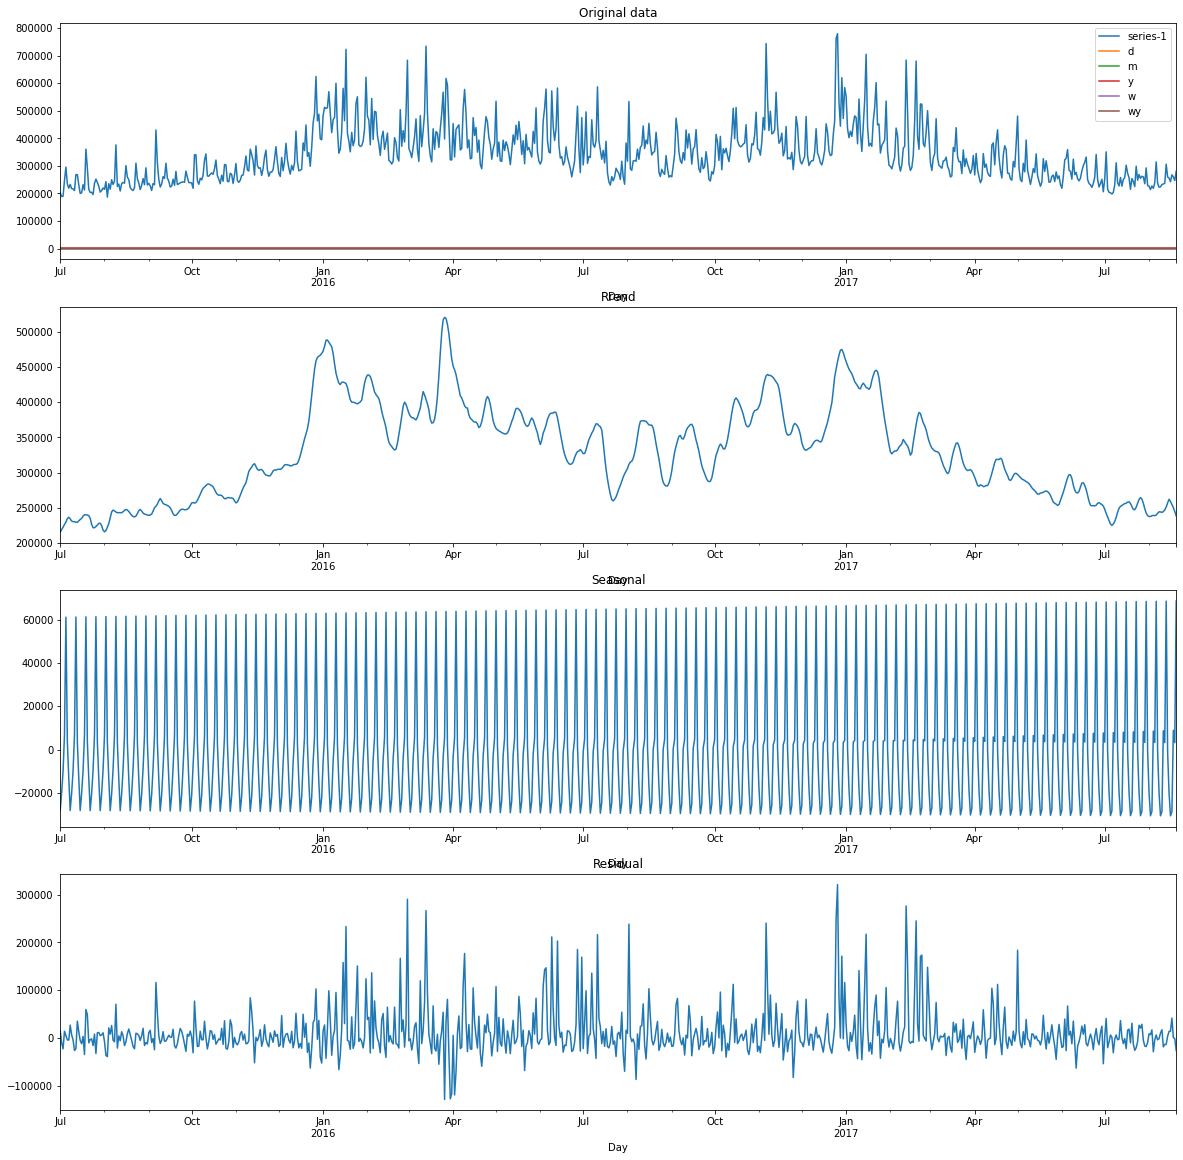

In [46]:
# STL decomposition
from statsmodels.tsa.seasonal import STL

stl = STL(DT[myts], period = 7, robust = True, seasonal = 7*120 + 1)
resultSTL = stl.fit()
fig16, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=1, nrows=4, figsize=(20,20))

DT.plot( ax=ax1, title="Original data" ) 
resultSTL.trend.plot( ax=ax2, title="Rrend" ) 
resultSTL.seasonal.plot( ax=ax3, title="Seasonal" ) 
resultSTL.resid.plot( ax=ax4, title="Residual" )

Produce forecasts for the next 21 days using simple methods. Analyze the residuals. Compare the forecast accuracy for different accuracy measures.